# **Twitter Sentiment Analysis**

## **Importing the libraries**

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 

## **Data Collection:** Gather a dataset of social media posts with labeled sentiments.

**About Dataset** : The dataset has three sentiments namely, negative(-1), neutral(0), and positive(+1). It contains two fields for the tweet and label.

In [89]:
df = pd.read_csv("Twitter_Data.csv", quoting = 3)
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [90]:
df.shape

(192131, 2)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192131 entries, 0 to 192130
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  192127 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.9+ MB


In [92]:
df.isnull().sum()

clean_text        4
category      29158
dtype: int64

In [93]:
df = df.dropna(how='any', axis=0).reset_index(drop = True)
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [94]:
df['category_name'] = df['category'].map({
    -1 : "Negative",
    0 : "Netural",
    1 : "Positive" 
})
df.sample()

,clean_text,category,category_name
119424,voted pwer will scrap isro drdo has served pur...,-1.0,Negative


In [95]:
(df['category_name'].value_counts() / len(df) * 100).round(2)

Positive    44.33
Netural     33.88
Negative    21.79
Name: category_name, dtype: float64

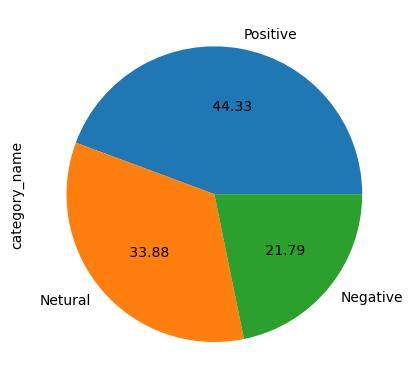

In [96]:
df['category_name'].value_counts().plot.pie(autopct = '% .2f')
plt.show()

In [97]:
X = df['clean_text']
y = df['category_name']

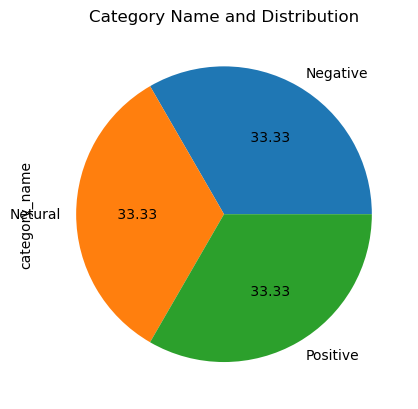

In [98]:
# Creating Balanced Dataset
from imblearn.under_sampling import RandomUnderSampler

# Defining the sampling strategy as a dictionary
sampling_strategy = {
    "Negative" : 35509,
    "Netural" : 35509,
    "Positive" : 35509
}

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X = np.array(X).reshape(-1, 1)
X_res, y_res = rus.fit_resample(X, y)

y_res.value_counts().plot.pie(autopct = '% .2f')
plt.title("Category Name and Distribution")
plt.show()

In [99]:
X_res_array = np.array(X_res).reshape(-1, 1)
y_res_array = np.array(y_res).reshape(-1, 1)

# Concatenate the arrays along the second axis (axis=1)
concatenated_array = np.concatenate((X_res_array, y_res_array), axis=1)
df_balanced = pd.DataFrame(concatenated_array).reset_index(drop = True)
df_balanced.columns = ['Text', 'Category_Name']
df_balanced.sample(5)

,Text,Category_Name
30376,launch low orbit satellite and then shoot down...,Negative
4888,modi enough the water has already gushed under...,Negative
2026,pappuji can you explain what you mean remoniti...,Negative
103885,lol why don’ they take help aaj tak zee abp an...,Positive
43953,"download the app """,Netural


## **Text Preprocessing:** Clean and preprocess the text data by removing special characters, stopwords, and performing tokenization.

In [100]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [101]:
all_stopwords = stopwords.words('english')
remove_words = ["don't" ,'not', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
all_stopwords = set([i for i in all_stopwords if i  not in remove_words])

In [102]:
def preprocess_text(t):
    text = re.sub('[^a-zA-Z]', ' ', t)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    text = [ps.stem(word) for word in text if not word in all_stopwords]
    text = ' '.join(text)
    return text

In [103]:
df_balanced["Text"] = df_balanced["Text"].astype(str).apply(preprocess_text)

## **Feature Extraction:** Convert the text data into numerical features using techniques like TF-IDF or word embeddings.

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [105]:
X = tfidf.fit_transform(df_balanced["Text"])
y = df_balanced['Category_Name'].values

In [106]:
# Saving the tfidf Model
with open ('model_pickel_tfidf', 'wb') as fe:
    pickle.dump(tfidf, fe)

In [107]:
# LabelEncoding the target values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 2 2 2]


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

## **Model Selection:** Choose a suitable classification algorithm such as Naive Bayes, Support Vector Machines, or a neural network.

Here i take three machine learing algorithm Naive Bayes, Random Forest and Xgboost. 

In [109]:
from sklearn.naive_bayes import MultinomialNB
classifier1 = MultinomialNB()

In [110]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=10)

In [111]:
from xgboost import XGBClassifier
classifier3 = XGBClassifier(max_depth = 6, n_estimators=10)

## **Model Training:** Train the selected model using the preprocessed data.

In [112]:
classifier1.fit(X_train, y_train)

MultinomialNB()

In [113]:
with open ('model_pickel_naive_bayes', 'wb') as f:
    pickle.dump(classifier1, f)

In [114]:
classifier2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [115]:
with open ('model_pickel_rfc', 'wb') as f:
    pickle.dump(classifier2, f)

In [116]:
classifier3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [117]:
with open ('model_pickel_xgboost', 'wb') as f:
    pickle.dump(classifier3, f)

## **Model Evaluation:** Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.

In [118]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Naive Bayes...")
print(f'Accuracy: {accuracy*100 : .2f} % \n\nClassification Report:\n{classification_rep}')

Naive Bayes...
Accuracy:  67.06 % 

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.81      0.69      7102
           1       0.78      0.52      0.62      7102
           2       0.68      0.69      0.68      7102

    accuracy                           0.67     21306
   macro avg       0.69      0.67      0.67     21306
weighted avg       0.69      0.67      0.67     21306



In [119]:
# Dataframe of Predicted and Actual value of dependent variable of test set
pred_data = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
pred_data.columns = ['Y Test Predictions', 'Y Test Actual']
pred_data.tail(10)

,Y Test Predictions,Y Test Actual
21296,2,2
21297,0,2
21298,0,2
21299,2,2
21300,0,2
21301,1,1
21302,0,0
21303,1,2
21304,2,1
21305,0,0


In [120]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Random Forest...")
print(f'Accuracy: {accuracy*100 : .2f} % \n\nClassification Report:\n{classification_rep}')

Random Forest...
Accuracy:  71.71 % 

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      7102
           1       0.69      0.82      0.75      7102
           2       0.77      0.63      0.69      7102

    accuracy                           0.72     21306
   macro avg       0.72      0.72      0.72     21306
weighted avg       0.72      0.72      0.72     21306



In [121]:
# Dataframe of Predicted and Actual value of dependent variable of test set
pred_data = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
pred_data.columns = ['Y Test Predictions', 'Y Test Actual']
pred_data.tail(10)

,Y Test Predictions,Y Test Actual
21296,2,2
21297,1,2
21298,2,2
21299,2,2
21300,0,2
21301,1,1
21302,0,0
21303,2,2
21304,1,1
21305,0,0


In [122]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("XGBoost...")
print(f'Accuracy: {accuracy*100 : .2f} % \n\nClassification Report:\n{classification_rep}')

XGBoost...
Accuracy:  62.59 % 

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.55      0.59      7102
           1       0.54      0.86      0.67      7102
           2       0.85      0.47      0.61      7102

    accuracy                           0.63     21306
   macro avg       0.68      0.63      0.62     21306
weighted avg       0.68      0.63      0.62     21306



In [123]:
# Dataframe of Predicted and Actual value of dependent variable of test set
pred_data = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
pred_data.columns = ['Y Test Predictions', 'Y Test Actual']
pred_data.tail(10)

,Y Test Predictions,Y Test Actual
21296,2,2
21297,1,2
21298,0,2
21299,2,2
21300,1,2
21301,1,1
21302,0,0
21303,1,2
21304,1,1
21305,0,0


## **Prediction**

In [128]:
a = "I don't like to eat orange"

a = preprocess_text(a)
new_corpus = [a]
new_X_test = tfidf.transform(new_corpus).toarray()
new_y_pred = classifier1.predict(new_X_test)

if new_y_pred[0] == 0 :
    print("Negative")
elif new_y_pred[0] == 1 :
    print("Neutral")
elif new_y_pred[0] == 2 :
    print('Positive')

Negative


In [129]:
a = "I don't like to eat orange"

a = preprocess_text(a)
new_corpus = [a]
new_X_test = tfidf.transform(new_corpus).toarray()
new_y_pred = classifier2.predict(new_X_test)

if new_y_pred[0] == 0 :
    print("Negative")
elif new_y_pred[0] == 1 :
    print("Neutral")
elif new_y_pred[0] == 2 :
    print('Positive')

Neutral


In [131]:
a = "I like to eat orange"

a = preprocess_text(a)
new_corpus = [a]
new_X_test = tfidf.transform(new_corpus).toarray()
new_y_pred = classifier3.predict(new_X_test)

if new_y_pred[0] == 0 :
    print("Negative")
elif new_y_pred[0] == 1 :
    print("Neutral")
elif new_y_pred[0] == 2 :
    print('Positive')

Negative


In [127]:
# That's why I don't like to eat orange
# I love ML